In [1]:
# imports
from importlib import reload

import os # a module to interact with the operating system
os.environ["ENDPOINT_URL"]="http://rook-ceph-rgw-nautiluss3.rook"
import numpy as np

import pandas as pd
import xarray
import h5py
import healpy as hp
import time

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import spatial_plots as sp
from ulmo.plotting import gallery as ulmo_gallery

In [2]:
v98 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_98clear_std.parquet')
llc = ulmo_io.load_main_table('s3://llc/Tables/LLC_uniform144_r0.5.parquet')

Read main table: s3://viirs/Tables/VIIRS_all_98clear_std.parquet
Read main table: s3://llc/Tables/LLC_uniform144_r0.5.parquet


In [3]:
v98['DT'] = v98.T90 - v98.T10

In [4]:
llc['DT'] = llc.T90 - llc.T10

# Area

In [5]:
evts_v98 = np.load('evts_v98', allow_pickle=True)
hp_lons_v98 = np.load('hp_lons_v98', allow_pickle=True)
hp_lats_v98 = np.load('hp_lats_v98', allow_pickle=True)
meds_v98 = np.load('meds_v98', allow_pickle=True)
evts_llc= np.load('evts_llc', allow_pickle=True)
hp_lons_llc= np.load('hp_lons_llc', allow_pickle=True)
hp_lats_llc= np.load('hp_lats_llc', allow_pickle=True)
meds_llc= np.load('meds_llc', allow_pickle=True)

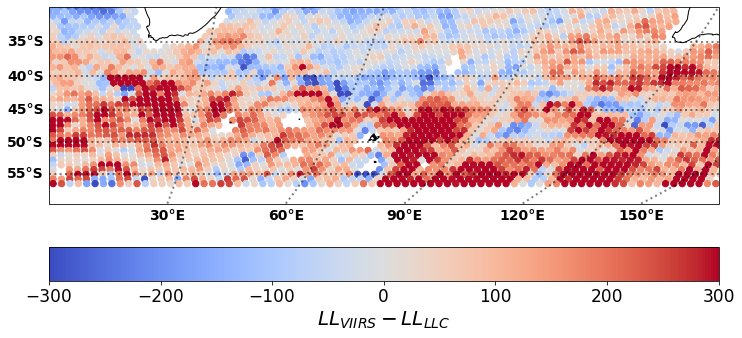

In [6]:
fig = plt.figure(figsize=(12,8))
plt.clf()

tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

ax = plt.axes(projection=tformM)

cm = plt.get_cmap('coolwarm')
# Cut
good = np.invert(meds_v98.mask)
img = plt.scatter(x=hp_lons_llc[good],
    y=hp_lats_llc[good],
    c=meds_v98[good]- meds_llc[good], vmin = -300, vmax = 300, 
    cmap=cm,
    s=40,
    transform=tformP)

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.1)
clbl = r'$LL_{VIIRS} - LL_{LLC}$'
cb.set_label(clbl, fontsize=20.)
cb.ax.tick_params(labelsize=17)

# Coast lines

ax.coastlines(zorder=10)
ax.set_extent([0, 120, -60, -30], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, x_inline=False, y_inline=False, 
        color='black', alpha=0.5, linestyle=':', draw_labels=True)
gl.top_labels=False
gl.bottom_labels=True
gl.left_labels=True
gl.right_labels=False
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'size': 14, 'weight': 'bold'}
gl.ylabel_style = {'color': 'black', 'size': 14, 'weight': 'bold'}

plt.savefig('acc', dpi = 600)

# ACC 1

In [54]:
R2 = dict( lon=60, dlon=5., lat=-46, dlat=2)
R1 = dict( lon=60, dlon=5., lat=-41, dlat=2)

In [55]:
blue, red = [((np.abs(v98.lon.values - R['lon']) < R['dlon']) & (np.abs(v98.lat.values - R['lat']) < R['dlat'])) for R in [R1, R2]]

In [56]:
vblue = v98[blue]
vred = v98[red]

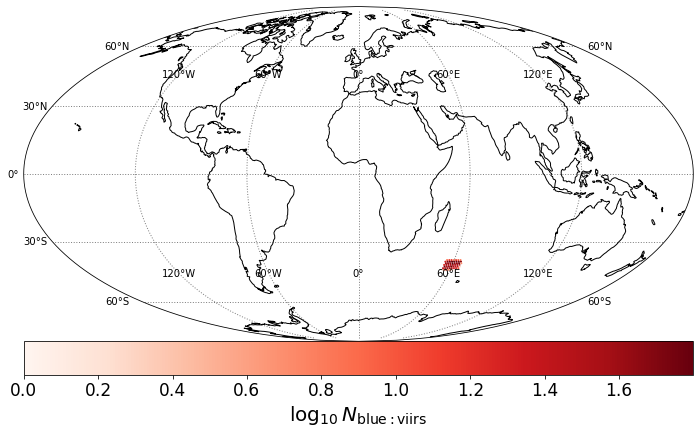

In [57]:
_ = ulmo_figs.show_spatial(vblue, lbl = 'blue:viirs')

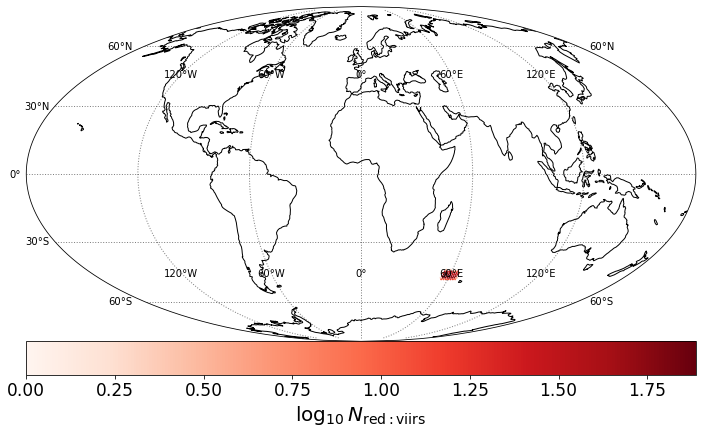

In [58]:
_ = ulmo_figs.show_spatial(vred, lbl = 'red:viirs')

# ACC: 80 E

In [16]:
R3 = dict( lon=80, dlon=5., lat=-48, dlat=3)
e80 = ((np.abs(v98.lon.values - R3['lon']) < R3['dlon']) & (np.abs(v98.lat.values - R3['lat']) < R3['dlat']))
acc = v98[e80]

/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/opt/conda/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


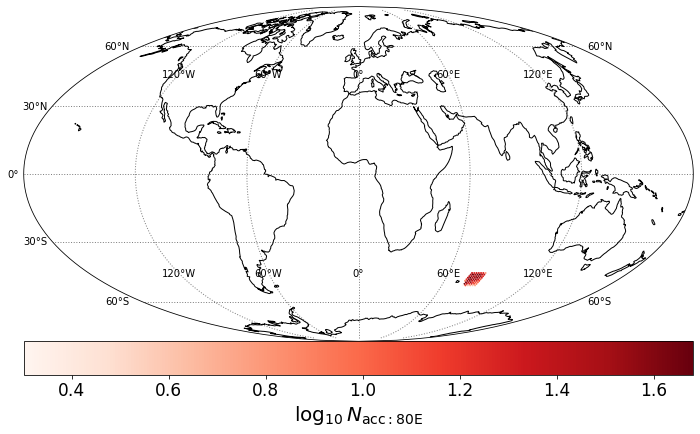

<GeoAxesSubplot:>

In [18]:
ulmo_figs.show_spatial(acc, lbl = 'acc: 80 E')

# Galleries

Median LL is 86.66302490234375.
Temperature scale is -2.539304733276367 to 2.452909469604492.


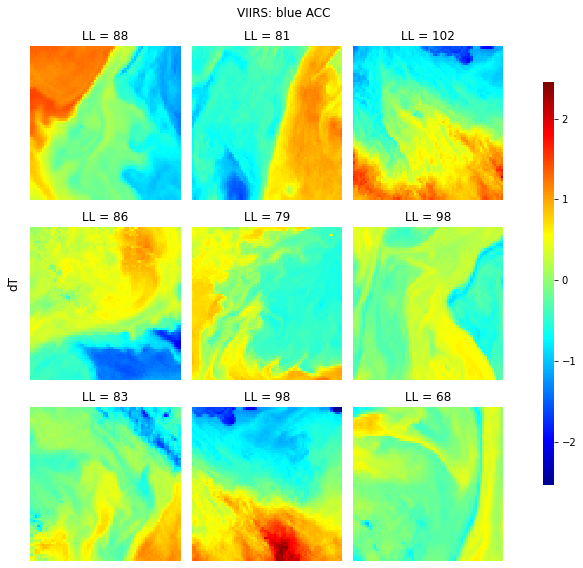

In [65]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-43, north=-39, mid_lon=-60, dlon=5, tmin=True, tmax=True, title='VIIRS: blue ACC')

Median LL is 194.68890380859375.
Temperature scale is -2.539304733276367 to 2.452909469604492.


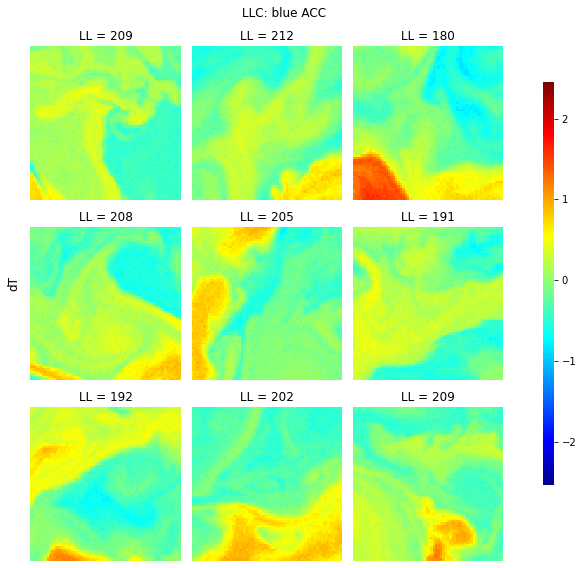

In [67]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-43, north=-39, mid_lon=-60, dlon=5, tmin=-2.539304733276367, tmax=2.452909469604492, title='LLC: blue ACC')

Median LL is -78.250244140625.
Temperature scale is -6.557860374450684 to 6.501729965209961.


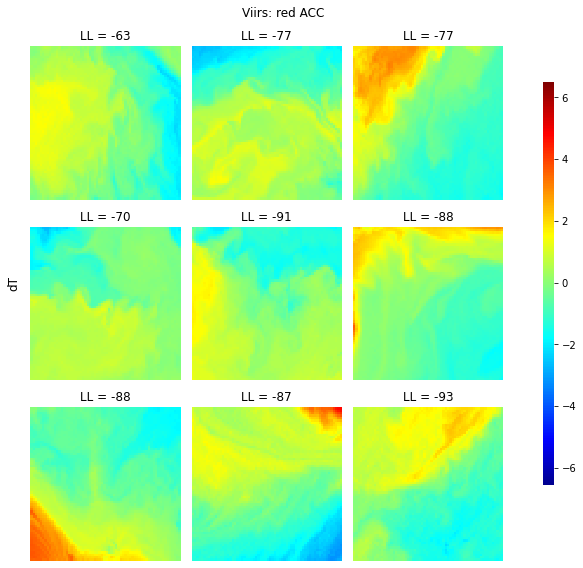

In [63]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-48, north=-44, mid_lon=-60, dlon=5, tmin=-6.557860374450684, tmax=6.501729965209961, title='Viirs: red ACC')

Median LL is -270.8603820800781.
Temperature scale is -6.557860374450684 to 6.501729965209961.


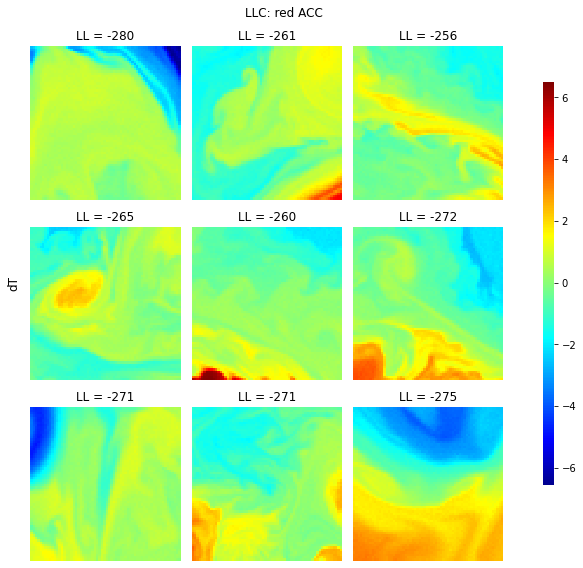

In [62]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-48, north=-44, mid_lon=-60, dlon=5, tmin=True, tmax=True, title='LLC: red ACC')

Median LL is -455.1895294189453.
Temperature scale is -4.847938537597656 to 4.308053016662598.


/home/jovyan/ulmo/ulmo/plotting/gallery.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  return fig.tight_layout(rect=[0, 0, .9, 1])


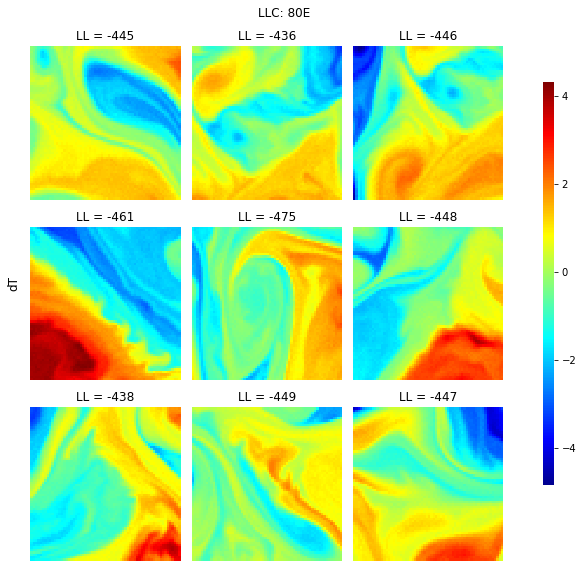

In [19]:
ulmo_gallery.gallery(tbl=llc, a=3, b=3, dLL=20, south=-51, north=-45, mid_lon=-80, dlon=5, tmin=True, tmax=True, title='LLC: 80E')

Median LL is -61.41119384765625.
Temperature scale is -4.847938537597656 to 4.308053016662598.


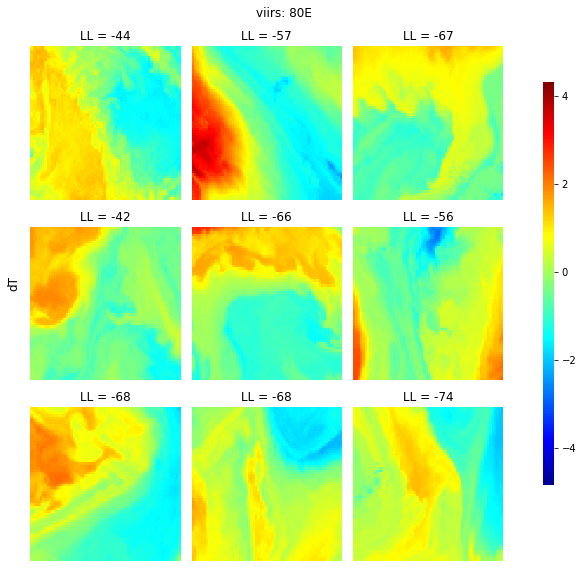

In [21]:
ulmo_gallery.gallery(tbl=v98, a=3, b=3, dLL=20, south=-51, north=-45, mid_lon=-80, dlon=5, tmin=-4.847938537597656, tmax=4.308053016662598, title='viirs: 80E')

# Distributions

In [ ]:
south=0
north=2
mid_lon=100
dlon=5

In [ ]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_np = v98[ rect ]

In [ ]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_np = llc[ rect ]

In [ ]:
south=-2
north=0
mid_lon=100
dlon=5

In [ ]:
rect = (v98.lat > south ) & (v98.lat < north) & (np.abs(v98.lon + mid_lon) < dlon)
viirs_sp = v98[ rect ]

In [ ]:
rect = (llc.lat > south ) & (llc.lat < north) & (np.abs(llc.lon + mid_lon) < dlon)
llc_sp = llc[ rect ]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('North of Equator')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('North of Equator')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('South of Equator')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='VIIRS')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='LLC')
                  
ax.legend()
fig.suptitle('South of Equator')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = viirs_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = viirs_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('VIIRS')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'LL', binwidth= 20, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'LL', binwidth= 20, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (12,8))
sns.set(font_scale = 2)
ax = sns.histplot( data = llc_np, x = 'DT', binwidth= 0.1, color = 'orange', stat = 'density', label='North')
ax = sns.histplot( data = llc_sp, x = 'DT', binwidth= 0.1, color = 'seagreen', stat = 'density', label='South')
                  
ax.legend()
fig.suptitle('LLC')

# LLC Comparison

In [ ]:
sns.set(font_scale = 1)

In [ ]:
ulmo_gallery.gallery(tbl=llc, title='LLC: North EQ. Pacific')

In [ ]:
ulmo_gallery.gallery(tbl=llc, south=-2, north=0, tmin=-0.97503662109375, tmax=0.8544101715087891, title='LLC: South EQ. Pacific')

# VIIRS Comparison

In [ ]:
ulmo_gallery.gallery(tbl=v98, title='VIIRS: North EQ. Pacific')

In [ ]:
ulmo_gallery.gallery(tbl=v98, south = -2, north = 0, tmin=-1.186056137084961, tmax = 2.349224090576172, title='VIIRS: South EQ. Pacific')